# <span style='color:red'> Predict electricity consumption of a building using Scikit-learn.   </span>

# <span style='color:Blue'> import libraries and helper functions.   </span>

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

 
# <span style='color:blue'>  Import the  the building dataset based on geographical location and usage in an interactive way</span>

## <span style='color:blue'>  Import the metadata file    </span>


In [2]:
#import the metadata file 
metadata=pd.read_csv("data/meta_open.csv")

In [3]:
#test 
metadata.head()

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename,annualschedule
0,Office_Abbey,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,74180.0,6891.544540,College/University,America/Phoenix,1930,Abbey,Office,weather0.csv,schedule2.csv
1,Office_Abigail,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,9703.0,901.437809,College/University,America/Phoenix,1940,Abigail,Office,weather0.csv,schedule2.csv
2,Office_Al,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,118966.0,11052.298300,College/University,America/Phoenix,1988,Al,Office,weather0.csv,schedule2.csv
3,Office_Alannah,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,10135.0,941.571905,College/University,America/Phoenix,NaN,Alannah,Office,weather0.csv,schedule2.csv
4,Office_Aliyah,31/12/2015 23:00,01/01/2015 0:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,202435.0,18806.818810,College/University,America/Phoenix,1967,Aliyah,Office,weather0.csv,schedule2.csv


## <span style='color:blue'>  Import the building data </span>



In [4]:
#creating a list of all possible timezones and industries  in order to validate the user input
Timezone_data={'America/New_York','Europe/London','America/Phoenix','America/Chicago','America/Los_Angeles','Euope/Zurich','Asia/Singapore','America/Denver'}
Industry_data={'Education','Government','Commercial Property'}

In [5]:
#store  the timezone user input
while True:
    Timezone=input("Please enter Timezone")
    if Timezone not in Timezone_data:
        print("This is an invalid Timezone")
        continue
    else:
        break

Please enter TimezoneAmerica/Chicago


In [6]:
#store the industry user input
while True:
    Industry=input("Please enter Industry")
    if Timezone not in Timezone_data:
        print("This is an invalid Industry")
        continue
    else:
        break

Please enter IndustryEducation


In [7]:
#filter the data based on the timezone and industry
filtered_metadata=metadata.loc[(metadata["timezone"]==Timezone) & (metadata["industry"]==Industry)]
#load the filtered data 
filtered_metadata[['uid' , 'newweatherfilename']]

,uid,newweatherfilename
90,Office_Mada,weather3.csv
91,Office_Madeleine,weather3.csv
92,Office_Madisyn,weather3.csv
93,Office_Malik,weather3.csv
94,Office_Marc,weather3.csv
...,...,...
484,UnivLab_Marie,weather3.csv
485,UnivLab_Mario,weather3.csv
486,UnivLab_Marshall,weather3.csv
487,UnivLab_Miles,weather3.csv


# <span style='color:blue'> Asses the data for quality and tidy issues.   </span>


## <span style='color:blue'> Load the corresponding files   </span>

In [8]:


#Save the building name to building_file  
building_file=filtered_metadata['uid'].values[0]+'.csv'

#load the data of the first building
building_data=pd.read_csv('data/{}'.format(building_file))

#Save the weather file name to weather_file
weather_file=filtered_metadata['newweatherfilename'].values[0]

# load the weather data 
weather_data=pd.read_csv('data/{}'.format(weather_file))

#Test:Show the first five rows of the building data 
building_data.head()
#Test : Show the first five rows of the weather data

weather_data.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [9]:
#Visual assessment : 
building_data.head()

,timestamp,Office_Mada
0,2014-05-01 00:00:00,46.50
1,2014-05-01 01:00:00,43.50
2,2014-05-01 02:00:00,45.00
3,2014-05-01 03:00:00,45.75
4,2014-05-01 04:00:00,45.25


In [10]:
#Visual assessment :

weather_data.head()

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeCDT,TimeCST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2014-05-01 00:53:00,Light Drizzle,2014-05-01 05:53:00<br />,3.9,NaN,-,100.0,0.0,1007.3,3.9,12:53 AM,NaN,6.4,NNW,18.5,330,2014-05-01 00:53:00
1,2014-05-01 01:01:00,Overcast,2014-05-01 06:01:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:01 AM,NaN,8.0,NNW,18.5,330,2014-05-01 01:01:00
2,2014-05-01 01:10:00,Overcast,2014-05-01 06:10:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:10 AM,NaN,12.9,NW,18.5,320,2014-05-01 01:10:00
3,2014-05-01 01:19:00,Overcast,2014-05-01 06:19:00<br />,3.9,NaN,-,100.0,0.0,1006.7,3.9,1:19 AM,NaN,14.5,NNW,20.4,340,2014-05-01 01:19:00
4,2014-05-01 01:29:00,Overcast,2014-05-01 06:29:00<br />,3.3,NaN,-,93.0,0.0,1006.3,4.4,1:29 AM,NaN,16.1,NNW,16.7,330,2014-05-01 01:29:00


In [11]:
#Programmatic assessment : 

building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    8760 non-null   object 
 1   Office_Mada  8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [12]:
#Programmatic assessment : 

weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10810 entries, 0 to 10809
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10810 non-null  object 
 1   Conditions             10810 non-null  object 
 2   DateUTC<br />          10810 non-null  object 
 3   Dew PointC             10810 non-null  float64
 4   Events                 1573 non-null   object 
 5   Gust SpeedKm/h         10810 non-null  object 
 6   Humidity               10809 non-null  float64
 7   Precipitationmm        1968 non-null   float64
 8   Sea Level PressurehPa  10810 non-null  float64
 9   TemperatureC           10810 non-null  float64
 10  TimeCDT                6816 non-null   object 
 11  TimeCST                3994 non-null   object 
 12  VisibilityKm           10810 non-null  float64
 13  Wind Direction         10810 non-null  object 
 14  Wind SpeedKm/h         10810 non-null  object 
 15  Wi

In [ ]:
#Issues : 

## <span style='color:blue'>  Clean the data   </span>


In [14]:
# convert timestamp data type to datetime
building_data['timestamp']=pd.to_datetime(building_data['timestamp'])
 #rename columns 
building_data.columns=['timestamp','KWH']

In [15]:
# convert timestamp data type to datetime
weather_data['timestamp']=pd.to_datetime(weather_data['timestamp'])


In [16]:
#Drop unwanted columns 
weather_data=weather_data[['timestamp','Humidity','TemperatureC']]


In [17]:
#Resample the weather data , as it is essential to resample the data before merging the two data frames
# set the time stamp column as the index
weather_data=weather_data.set_index('timestamp')
 # resample the data hourly 
weather_data=weather_data.resample('H').mean()

In [18]:
#Resample the building data , as it is essential to resample the data before merging the two data frames
# set the time stamp column as the index
building_data=building_data.set_index('timestamp')
 # resample the data hourly 
building_data=building_data.resample('H').mean()

In [21]:
# Merge the two dataframes 
building_data_clean=pd.merge(building_data,weather_data, how='left', on='timestamp')
# fill null values
building_data_clean=building_data_clean.fillna(method='bfill')
#test
building_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2014-05-01 00:00:00 to 2015-04-30 23:00:00
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KWH           8760 non-null   float64
 1   Humidity      8760 non-null   float64
 2   TemperatureC  8760 non-null   float64
dtypes: float64(3)
memory usage: 273.8 KB


# <span style='color:blue'> Normalize the dataset  </span>

## <span style='color:blue'>  Normalize the dataset   </span>


In [22]:
#normalize the data by subtracting the column  mean from each observation and then dividing by the standard deviation
df_normalized=(building_data_clean-building_data_clean.mean())/building_data_clean.std()

## <span style='color:blue'> Revert label function </span>



In [23]:
y_mean=building_data_clean['KWH'].mean()
y_std=building_data_clean['KWH'].std()

#make the revert_label_value function to revert back the normalized label to its original distribution
def revert_label_value(pred):
    return (pred*y_std+y_mean)

# <span style='color:blue'>  Create train and test data sets  </span>


## <span style='color:blue'>  Split the train and test datasets  </span>

In [24]:
# Create the train set 
train_set=df_normalized.truncate(before='2014-01-01', after='2014-12-31')
# Create the test set
test_set=df_normalized.truncate(before='2014-12-31', after='2015-12-31')

## <span style='color:blue'>  select labels  </span>

In [25]:
#select the label for the train set 
train_label=train_set['KWH']
#select the label for the test set 
test_label=test_set['KWH']

## <span style='color:blue'> Task 6.3 : Select features </span>

Machine learning models require all input and output variables to be numeric.
<br>
This means encoding the timestamp to numbers before we can fit and evaluate a model.

In [41]:
#Encode train features
x=pd.get_dummies(train_set.index.hour)
y=pd.get_dummies(train_set.index.dayofweek)
w=pd.DataFrame(train_set['TemperatureC'].values)
z=pd.DataFrame(train_set['Humidity'].values)
train_features=pd.concat([x,y,w,z],axis=1).dropna()
#Encode test features 
x=pd.get_dummies(test_set.index.hour)
y=pd.get_dummies(test_set.index.dayofweek)
w=pd.DataFrame(test_set['TemperatureC'].values)
z=pd.DataFrame(test_set['Humidity'].values)
test_features=pd.concat([x,y,w,z],axis=1).dropna()

# <span style='color:blue'>  Create the prediction model</span>

## <span style='color:blue'>  Fit the model </span>


In [42]:


# predict KWH consumption For the Test set
knnreg=KNeighborsRegressor(n_neighbors=1).fit(np.array(train_features),np.array(train_label.values))
predict=knnreg.predict(np.array(test_features))

In [43]:
#Test
predict

array([-0.53457962, -0.81319395, -0.86891681, ..., -0.31168816,
       -0.69246107, -1.09180827])

## <span style='color:blue'> Covert the labels to the original distribution </span>


In [44]:
# Convert predict to Dataframe
predict=pd.DataFrame(predict, index=test_set.index)
#Give name to the predict column
predict.columns=['KWH']
#revert back the distribution to the original distribution
predict=predict['KWH'].apply(lambda x:revert_label_value(x))
#Test
predict
#revert back the distribution to the original distribution
test_set['KWH']=test_set['KWH'].apply(lambda x:revert_label_value(x))
#Test
test_set['KWH']

timestamp
2014-12-31 00:00:00    58.00
2014-12-31 01:00:00    58.25
2014-12-31 02:00:00    54.25
2014-12-31 03:00:00    55.00
2014-12-31 04:00:00    55.50
                       ...  
2015-04-30 19:00:00    79.50
2015-04-30 20:00:00    57.50
2015-04-30 21:00:00    52.25
2015-04-30 22:00:00    47.25
2015-04-30 23:00:00    41.25
Name: KWH, Length: 2904, dtype: float64

## <span style='color:blue'> visualize the predictions </span>
We will compare between the predicted label and the test set label to check how good our model predicted the test label.  

In [46]:
# merge the actual test set with the predicted one
actual_predict=pd.merge(test_set,predict,how='left',on='timestamp')
#name the columns 
actual_predict.columns=['KWH_actual','temperature_actual', 'humidity_actual', 'KWH_predict']
#Test
actual_predict.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2904 entries, 2014-12-31 00:00:00 to 2015-04-30 23:00:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   KWH_actual          2904 non-null   float64
 1   temperature_actual  2904 non-null   float64
 2   humidity_actual     2904 non-null   float64
 3   KWH_predict         2904 non-null   float64
dtypes: float64(4)
memory usage: 113.4 KB


In [47]:
#comparison set
actual_predict_plot=actual_predict[['KWH_actual', 'KWH_predict']]

<AxesSubplot:xlabel='timestamp'>

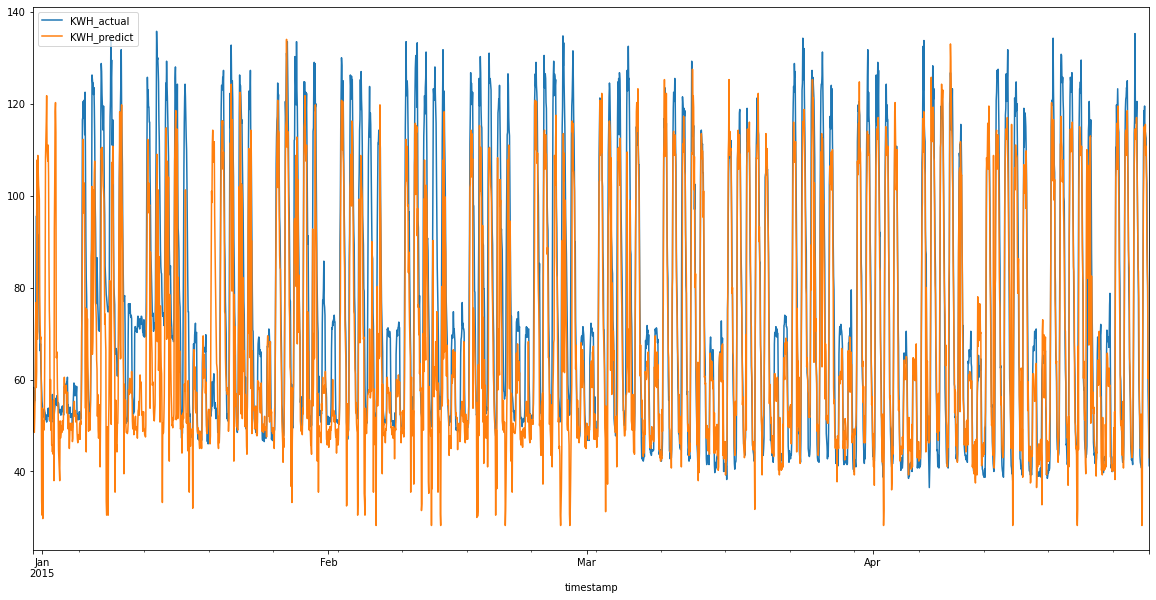

In [48]:
#plot set
actual_predict_plot.plot(figsize=(20,10))